In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
df=yf.download('AAPL',start='2018-01-01',end='2021-01-01')

[*********************100%%**********************]  1 of 1 completed


In [35]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608826,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797432,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.339035,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.964920,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.181229,121047300


In [46]:
def strategy(df,sma1,sma2):
    df=df.copy()
    df['ret']=np.log(df.Close.pct_change() +1 )
    df['SMA1']=df.Close.rolling(sma1).mean()
    df['SMA2']=df.Close.rolling(sma2).mean()
    df=df.dropna()
    df['position']=np.where(df['SMA1']>df['SMA2'],1,0)
    df['stratret']=df['position'].shift(1)*df['ret']
    df=df.dropna()
    return df
    

In [47]:
strategy(df,20,50)

,Open,High,Low,Close,Adj Close,Volume,ret,SMA1,SMA2,position,stratret
Date,,,,,,,,,,,
2018-03-15,44.625000,45.060001,44.517502,44.662498,42.294277,90975200,0.001176,44.090625,43.11210,1,0.001176
2018-03-16,44.662498,44.779999,44.404999,44.505001,42.145126,157618800,-0.003533,44.153500,43.14105,1,-0.003533
2018-03-19,44.330002,44.367500,43.415001,43.825001,41.501183,133787200,-0.015397,44.189375,43.15240,1,-0.015397
2018-03-20,43.810001,44.200001,43.735001,43.810001,41.486977,78597600,-0.000342,44.231750,43.15360,1,-0.000342
2018-03-21,43.759998,43.772499,42.814999,42.817501,40.547115,148219600,-0.022915,44.234250,43.13820,1,-0.022915
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.339035,54930100,0.007683,124.903000,119.73700,1,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.964920,124486200,0.035141,125.908001,120.05660,1,0.035141
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.181229,121047300,-0.013404,126.699000,120.37360,1,-0.013404


In [48]:
def performance(df):
    return np.exp(df[['ret','stratret']].sum())

In [49]:
performance(strategy(df,20,50))

ret         2.974445
stratret    2.779431
dtype: float64

In [50]:
stratdf=strategy(df,20,50)

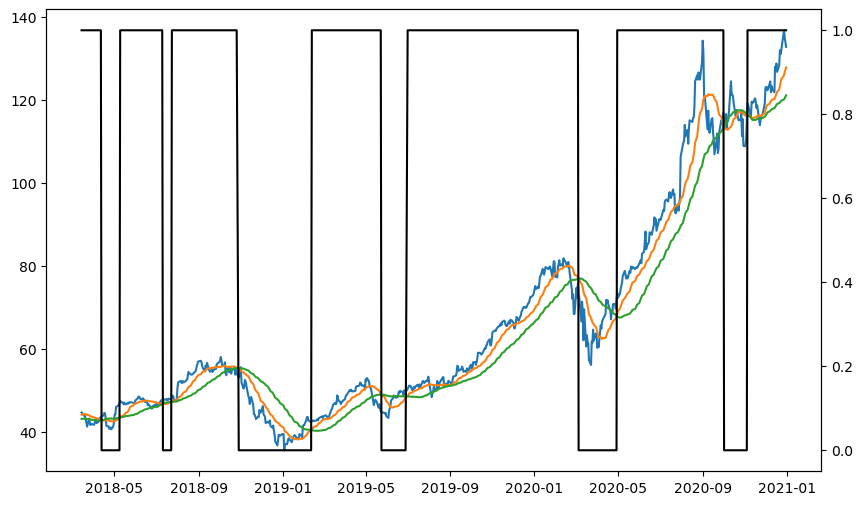

In [51]:
fig,ax=plt.subplots(figsize=(10,6))
ax2=ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])
ax2.plot(stratdf['position'],color='k')

In [52]:
SMA_list1= range(30,101,5)

SMA_list2=range(130,201,5)

In [53]:
def Tester(SMAlist1,SMAlist2):


    profits=[]

    a,b=[],[]

    for i,e in zip(SMA_list1,SMA_list2):
        profit=perfornamce(strategy(df,i,e))
        profits.append(profit)
        a.append(i)
        b.append(e)
    
    col={'level_0':'SMA1','level_1':'SMA2'}

    frame=pd.DataFrame(profits,[a,b]).reset_index().rename(columns=col)
    frame['edge']=frame.stratret-frame.ret
    return frame.sort_values('edge',ascending=False)

In [54]:
Tester(SMA_list1,SMA_list2)

,SMA1,SMA2,ret,stratret,edge
10,80,180,2.432001,2.075541,-0.356461
8,70,170,2.324225,1.928784,-0.395441
9,75,175,2.371052,1.964196,-0.406856
12,90,190,2.314899,1.860850,-0.454049
14,100,200,2.389197,1.867224,-0.521973
13,95,195,2.339490,1.813346,-0.526144
7,65,165,2.435349,1.906954,-0.528395
11,85,185,2.388766,1.839305,-0.549462
5,55,155,2.541102,1.907127,-0.633975
2,40,140,2.770002,2.119377,-0.650625


In [56]:
pd.DataFrame(profits,[a,b])

,,ret,stratret
30,130,2.869668,1.0
35,135,3.503889,1.0
40,140,3.319421,1.0
45,145,3.054539,1.0
50,150,2.583603,1.0
55,155,2.955418,1.0
60,160,2.648317,1.0
65,165,2.690351,1.0
70,170,3.027753,1.0
75,175,3.478113,1.0


In [ ]:
# https://www.youtube.com/watch?v=vWVZxiaaTCs